# Title

# Load and take a look at the data

In [262]:
# Load relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [263]:
# Load data
ds=pd.read_csv('heartdisease_data.csv')

In [264]:
ds.head(20)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0
5,66,1,3,120,0,0,1,120,0,-0.5,1,?,?,0
6,65,1,4,150,236,1,1,105,1,0,?,?,?,3
7,60,1,3,180,0,0,1,140,1,1.5,2,?,?,0
8,60,1,3,120,0,?,0,141,1,2,1,?,?,3
9,60,1,2,160,267,1,1,157,0,0.5,2,?,?,1


In [265]:
ds.shape

(200, 14)

In [266]:
ds.dtypes

age          int64
sex          int64
cp           int64
trestbps    object
chol        object
fbs         object
restecg      int64
thalach     object
exang       object
oldpeak     object
slope       object
ca          object
thal        object
num          int64
dtype: object

# Check and treat null values

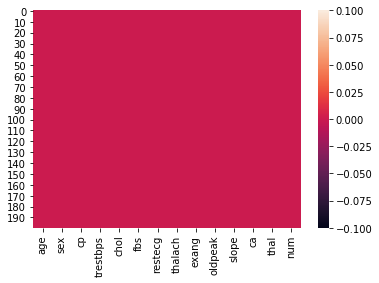

In [267]:
sns.heatmap(ds.isnull())

In [268]:
ds.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

The null values are deceptive because many fields contain unknown values (?)but appear to be filled

In [269]:
ds.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [270]:
# Change disease rating to reflect only that it is present/ not present
ds['num'].replace({2: 1,3:1,4:1}, inplace=True)

In [271]:
ds.head(20)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,4,140,260,0,1,112,1,3,2,?,?,1
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,1
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0
5,66,1,3,120,0,0,1,120,0,-0.5,1,?,?,0
6,65,1,4,150,236,1,1,105,1,0,?,?,?,1
7,60,1,3,180,0,0,1,140,1,1.5,2,?,?,0
8,60,1,3,120,0,?,0,141,1,2,1,?,?,1
9,60,1,2,160,267,1,1,157,0,0.5,2,?,?,1


In [272]:
# count the amounts of given entries in a column
ds['slope'].value_counts()

?    102
2     53
3     29
1     16
Name: slope, dtype: int64

In [273]:
# Drop 3 columns because they have > 50% unknown values and it
# can be assumed that these columns are not predictive of the target.

In [274]:
ds=ds.drop(columns=['slope', 'ca', 'thal'])

In [275]:
ds.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
0,63,1,4,140,260,0,1,112,1,3,1
1,44,1,4,130,209,0,1,127,0,0,0
2,60,1,4,132,218,0,1,140,1,1.5,1
3,55,1,4,142,228,0,1,149,1,2.5,1
4,66,1,3,110,213,1,2,99,1,1.3,0


In [276]:
ds.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'num'],
      dtype='object')

# Split dataset by filtering on rows based on the presence/absence of heart disease, then fill the unknown values with the most common values per column

In [277]:
# filter rows for patiants not presenting with the disease using  the num column(0)
Norows=ds['num']==0
No_ds=ds[Norows]
No_ds.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
1,44,1,4,130,209,0,1,127,0,0,0
4,66,1,3,110,213,1,2,99,1,1.3,0
5,66,1,3,120,0,0,1,120,0,-0.5,0
7,60,1,3,180,0,0,1,140,1,1.5,0
10,56,1,2,126,166,0,1,140,0,0,0


In [278]:
No_ds['trestbps'].value_counts()

?      19
130     4
120     4
110     3
126     2
150     2
140     2
134     2
154     1
180     1
128     1
100     1
155     1
160     1
124     1
118     1
152     1
132     1
106     1
114     1
104     1
Name: trestbps, dtype: int64

In [279]:
# Replace unknown values with the average of the most common known values in the column
No_ds['trestbps'].replace({'?': '125'}, inplace=True)

In [280]:
No_ds['chol'].value_counts()

0      12
240     3
213     2
220     2
298     1
214     1
272     1
207     1
182     1
224     1
283     1
385     1
236     1
227     1
274     1
254     1
160     1
218     1
203     1
223     1
181     1
171     1
458     1
197     1
161     1
166     1
165     1
?       1
271     1
195     1
139     1
310     1
252     1
175     1
258     1
209     1
Name: chol, dtype: int64

0 is a suspected outlier so 240 will be used as the most common value.

In [281]:
# Replace unknown values with the average of the most common known values in the column
No_ds['chol'].replace({'?': '240'}, inplace=True)

In [282]:
No_ds['fbs'].value_counts()

0    36
1    14
?     1
Name: fbs, dtype: int64

In [283]:
# Replace unknown values with the average of the most common known values in the column
No_ds['fbs'].replace({'?': '0'}, inplace=True)

In [284]:
No_ds['thalach'].value_counts()

?      19
120     3
160     3
128     2
86      2
140     2
96      2
110     1
165     1
127     1
112     1
99      1
180     1
118     1
100     1
131     1
69      1
80      1
133     1
151     1
111     1
107     1
150     1
161     1
154     1
Name: thalach, dtype: int64

In [285]:
# Replace unknown values with the average of the most common known values in the column
No_ds['thalach'].replace({'?': '120'}, inplace=True)

In [286]:
No_ds['exang'].value_counts()

0    20
?    19
1    12
Name: exang, dtype: int64

In [287]:
# Replace unknown values with the average of the most common known values in the column
No_ds['exang'].replace({'?': '0'}, inplace=True)

In [288]:
No_ds['oldpeak'].value_counts()

?       21
0       14
1        4
1.5      4
2        4
1.3      1
3        1
-0.5     1
0.5      1
Name: oldpeak, dtype: int64

In [289]:
# Replace unknown values with the average of the most common known values in the column
No_ds['oldpeak'].replace({'?': '0'}, inplace=True)

In [290]:
No_ds.head(20)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
1,44,1,4,130,209,0,1,127,0,0,0
4,66,1,3,110,213,1,2,99,1,1.3,0
5,66,1,3,120,0,0,1,120,0,-0.5,0
7,60,1,3,180,0,0,1,140,1,1.5,0
10,56,1,2,126,166,0,1,140,0,0,0
15,62,1,4,120,220,0,1,86,0,0,0
18,63,1,4,126,0,0,1,120,0,1.5,0
19,60,1,4,152,0,0,1,118,1,0,0
23,74,1,3,125,0,0,0,120,0,0,0
37,60,1,4,120,0,0,0,133,1,2,0


In [291]:
# filter rows for patiants presenting with the disease using  the num column(1)
Yesrows=ds['num']==1
Yes_ds=ds[Yesrows]
Yes_ds.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
0,63,1,4,140,260,0,1,112,1,3,1
2,60,1,4,132,218,0,1,140,1,1.5,1
3,55,1,4,142,228,0,1,149,1,2.5,1
6,65,1,4,150,236,1,1,105,1,0,1
8,60,1,3,120,0,?,0,141,1,2,1


In [292]:
Yes_ds['trestbps'].value_counts()

?      37
120    12
130    11
140     8
160     7
150     7
122     6
110     6
142     5
170     4
136     4
144     4
128     3
124     3
158     3
116     2
132     2
112     2
138     2
126     2
125     2
134     2
127     1
172     1
180     1
178     1
104     1
102     1
0       1
190     1
96      1
146     1
155     1
156     1
152     1
154     1
135     1
Name: trestbps, dtype: int64

In [293]:
# Replace unknown values with the most common known value in the column
Yes_ds['trestbps'].replace({'?': '120'}, inplace=True)

In [294]:
Yes_ds['chol'].value_counts()

0      37
?       6
258     3
219     3
203     3
       ..
192     1
142     1
153     1
222     1
177     1
Name: chol, Length: 79, dtype: int64

In [295]:
# Get the average of the most common values
common=(258+186+219)/3
common

221.0

In [296]:
# Replace unknown values with the most common known value in the column
Yes_ds['chol'].replace({'?': '221'}, inplace=True)

In [297]:
Yes_ds['fbs'].value_counts()

0    89
1    54
?     6
Name: fbs, dtype: int64

In [298]:
# Replace unknown values with the most common known value in the column
Yes_ds['fbs'].replace({'?': '0'}, inplace=True)

Since both the Yes and No dataets have 0 as the most common value for fbs it might not be a contributing factor. Consider dropping the column for modeling.

In [299]:
Yes_ds['thalach'].value_counts()

?      34
140    10
120     9
110     7
130     6
112     5
105     4
148     3
108     3
150     3
102     3
118     3
125     3
100     3
84      3
122     3
135     3
117     3
106     3
98      2
129     2
119     2
128     2
138     2
155     1
123     1
113     1
160     1
126     1
165     1
157     1
73      1
94      1
180     1
121     1
154     1
86      1
145     1
111     1
144     1
88      1
141     1
80      1
97      1
159     1
149     1
127     1
115     1
124     1
132     1
93      1
162     1
Name: thalach, dtype: int64

In [300]:
# Replace unknown values with the most common known value in the column
Yes_ds['thalach'].replace({'?': '140'}, inplace=True)

In [301]:
Yes_ds['exang'].value_counts()

1    83
?    34
0    32
Name: exang, dtype: int64

In [302]:
# Replace unknown values with the most common known value in the column
Yes_ds['exang'].replace({'?': '1'}, inplace=True)

In [303]:
Yes_ds['oldpeak'].value_counts()

?      35
0      26
2      21
1.5    17
1      14
3      12
2.5     9
0.5     6
4       4
3.5     1
0.8     1
1.3     1
1.7     1
1.6     1
Name: oldpeak, dtype: int64

In [304]:
# Replace unknown values with the most common known value in the column
Yes_ds['oldpeak'].replace({'?': '0'}, inplace=True)

In [305]:
Yes_ds.head(20)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
0,63,1,4,140,260,0,1,112,1,3,1
2,60,1,4,132,218,0,1,140,1,1.5,1
3,55,1,4,142,228,0,1,149,1,2.5,1
6,65,1,4,150,236,1,1,105,1,0,1
8,60,1,3,120,0,0,0,141,1,2,1
9,60,1,2,160,267,1,1,157,0,0.5,1
11,59,1,4,140,0,0,1,117,1,1,1
12,62,1,4,110,0,0,0,120,1,0.5,1
13,63,1,3,120,0,0,2,140,1,0,1
14,57,1,4,128,0,1,1,148,1,1,1


In [306]:
# Concatenate the yes and no datasets
sets = [No_ds,Yes_ds]
catds = pd.concat(sets)

In [307]:
catds.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
1,44,1,4,130,209,0,1,127,0,0,0
4,66,1,3,110,213,1,2,99,1,1.3,0
5,66,1,3,120,0,0,1,120,0,-0.5,0
7,60,1,3,180,0,0,1,140,1,1.5,0
10,56,1,2,126,166,0,1,140,0,0,0


In [308]:
catds.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
193,62,1,4,158,170,0,1,138,1,0,1
194,46,1,4,134,310,0,0,126,0,0,1
195,54,0,4,127,333,1,1,154,0,0,1
197,55,1,4,122,223,1,1,100,0,0,1
199,62,1,2,120,254,0,2,93,1,0,1


In [309]:
catds.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'num'],
      dtype='object')

In [310]:
# Convert string columns to numeric columns
catds[['trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak']] = catds[['trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak']].apply(pd.to_numeric)

In [311]:
# rename database for convenience
ids=catds
ids.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
num           int64
dtype: object

In [312]:
# Convert float column to integer
ids['oldpeak'] = ids['oldpeak'].astype(int)
ids.dtypes

age         int64
sex         int64
cp          int64
trestbps    int64
chol        int64
fbs         int64
restecg     int64
thalach     int64
exang       int64
oldpeak     int32
num         int64
dtype: object

# Check correlation

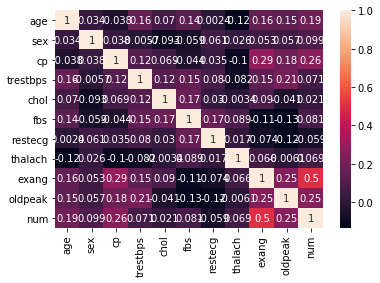

In [313]:
dscor=catds.corr()
sns.heatmap(dscor, annot=True)

The columns that correlate with the target best are:
age,cp, exang, oldpeak
The restecg has no correlation with the target column.

In [314]:
ids=ids.drop(columns=['restecg'])

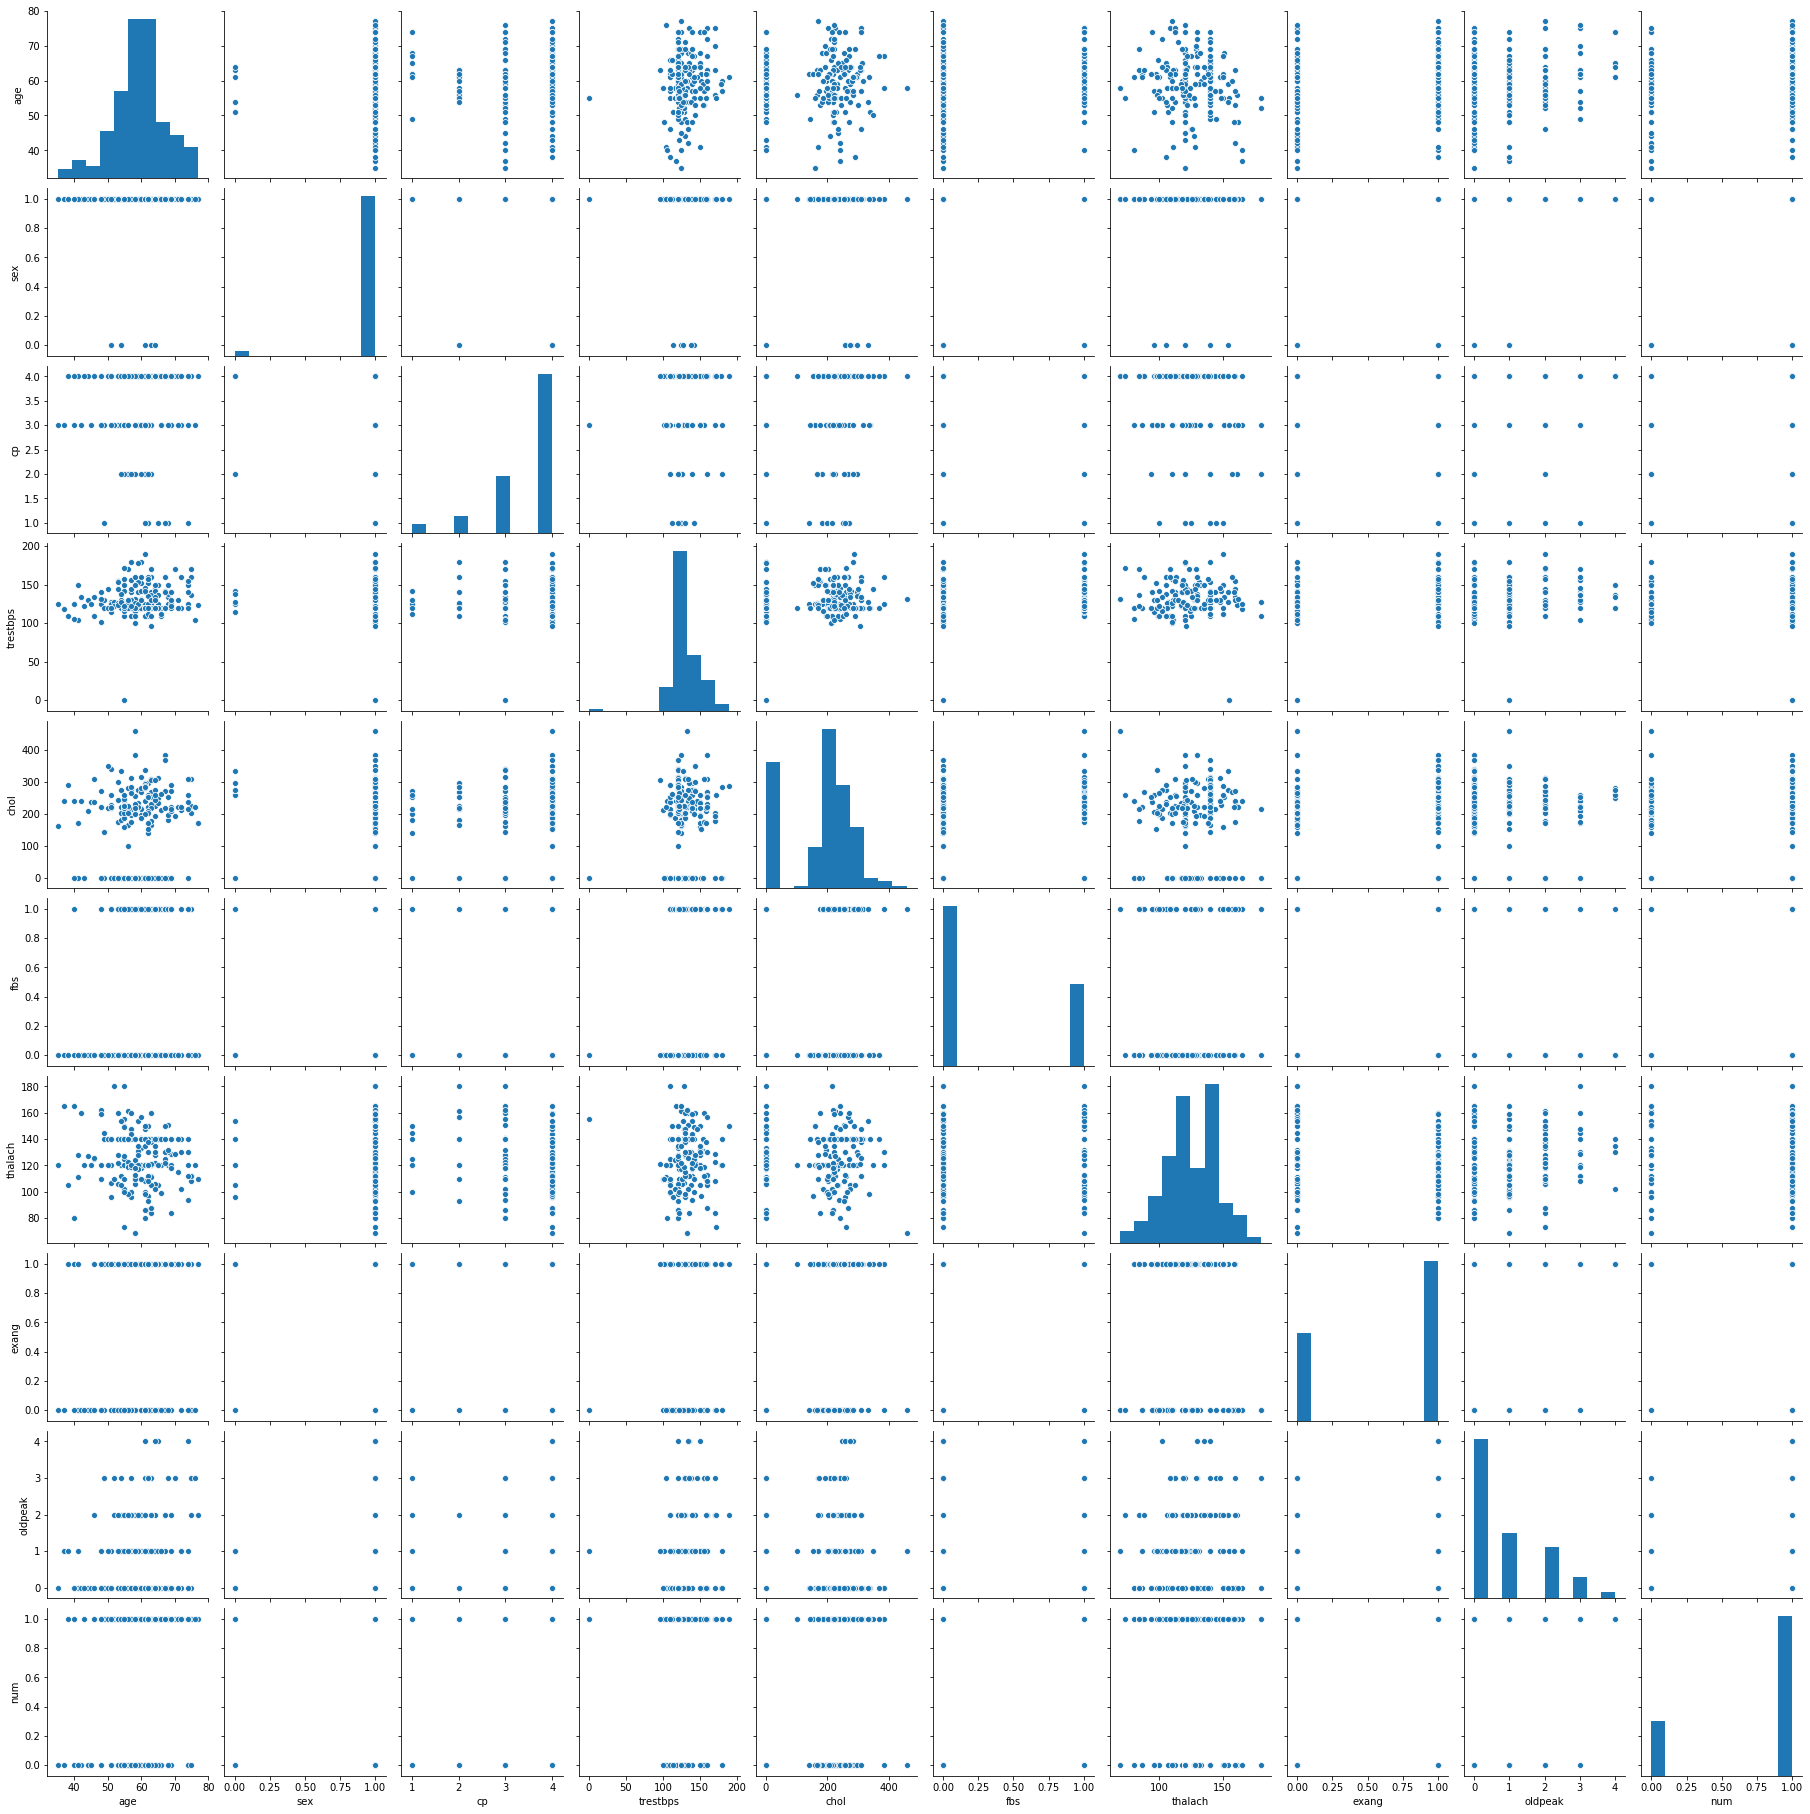

In [315]:
# Checking pairplots
sns.pairplot(ids)
plt.show()

# Summary statistics

In [316]:
ids.describe()

,age,sex,cp,trestbps,chol,fbs,thalach,exang,oldpeak,num
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,59.350000,0.970000,3.505000,130.385000,180.320000,0.340000,125.455000,0.645000,0.845000,0.745000
std,7.811697,0.171015,0.795701,19.089758,112.324537,0.474898,19.974808,0.479714,1.066142,0.436955
min,35.000000,0.000000,1.000000,0.000000,0.000000,0.000000,69.000000,0.000000,0.000000,0.000000
25%,55.000000,1.000000,3.000000,120.000000,129.250000,0.000000,112.000000,0.000000,0.000000,0.000000
50%,60.000000,1.000000,4.000000,125.000000,217.500000,0.000000,123.500000,1.000000,0.000000,1.000000
75%,64.000000,1.000000,4.000000,140.000000,254.500000,1.000000,140.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,4.000000,190.000000,458.000000,1.000000,180.000000,1.000000,4.000000,1.000000


The standard deviation for the restecg column is very high, since it correlates poorly with the target column it wil be dropped. The oldpeak column also has an enrmous stddev.

# Data visualizations

In [317]:
ids.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'thalach', 'exang',
       'oldpeak', 'num'],
      dtype='object')

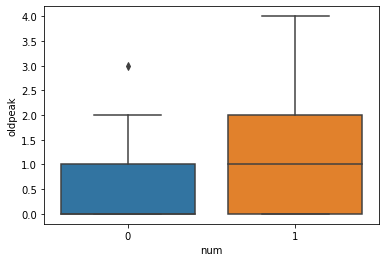

In [318]:
# Show distribution of oldpeak data when the disease is present and not present
sns.boxplot(x='num',y='oldpeak',data=ids)

When the disease is present the oldpeak scores are definitely higher

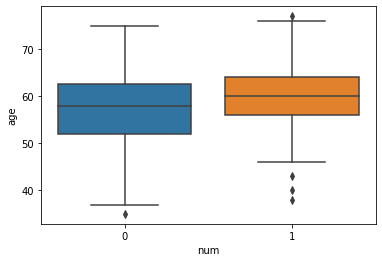

In [319]:
# Show distribution of age when the disease is present and not present
sns.boxplot(x='num',y='age',data=ids)

Older people do seem to be more succeptable overall but there are a few outliers

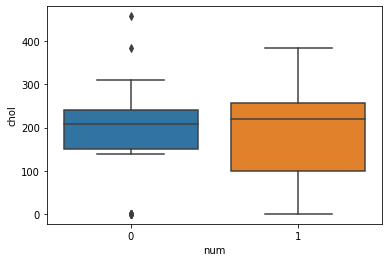

In [320]:
# Show distribution of age when the disease is present and not present
sns.boxplot(x='num',y='chol',data=ids)

The mean of cholesterol seems to be slightly higher in patients who have the disease but the spread is so wide that it renders it less relevant.

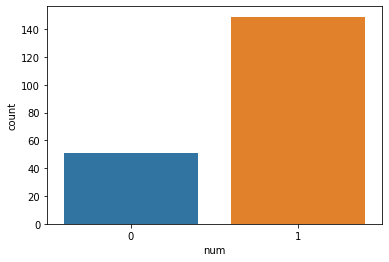

In [321]:
# Show the split of the where the disease is present and not present in the dataset.
sns.countplot(ids['num'])

The dataset is split at a ratio of roughly 1:3 for disease absent:present, this will affect the accuracy score of predictive models.

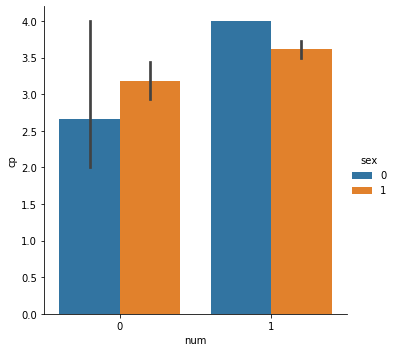

In [322]:
# Show the average cp values for gender where the disease is present and not.
sns.catplot(x='num', y= 'cp', hue='sex', data=ds, kind='bar')

The cp scores are higher in people who have heart disease, it is especially high in women who have heart disease

# Check eveness of dataset

In [323]:
# counts disease present vs not
num_counts = ids['num'].value_counts()
num_counts

1    149
0     51
Name: num, dtype: int64

In [324]:
# Percentage disease present vs not
num_percentage = ids['num'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
num_percentage

1    74.5%
0    25.5%
Name: num, dtype: object

The data is not distributed evenly over the target column, this overstate the accuray score of the models for heart disease present. 

# Drop irrelevant columns

In [325]:
ids.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'thalach', 'exang',
       'oldpeak', 'num'],
      dtype='object')

In [326]:
# Drop irrelevant (poorly correlated) columns - dataset renamed to nds (new dataset)
nds=ids.drop(columns=['sex', 'trestbps', 'chol', 'fbs', 'thalach'])

In [327]:
nds.head()

,age,cp,exang,oldpeak,num
1,44,4,0,0,0
4,66,3,1,1,0
5,66,3,0,0,0
7,60,3,1,1,0
10,56,2,0,0,0


# Find and remove outliers

In [328]:
nds.shape

(200, 5)

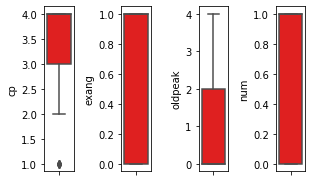

In [329]:
# Show boxplots for all columns, check outliers
collist=nds.columns.values
ncol=5
nrows=10

plt.figure(figsize=(ncol,5*ncol))
for i in range(1, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(nds[collist[i]], color='red', orient='v')
    plt.tight_layout()

In [330]:
# Remove outliers - dataset renamed to cds (clean dataset)
from scipy import stats
from scipy.stats import zscore

z_score=abs(zscore(nds))
print(nds.shape)
cds=nds.loc[(z_score<3).all(axis=1)]
print(cds.shape)

(200, 5)
(191, 5)


# Check and adjust skewness

In [331]:
# Show skewness (less than 0.55 is ok)
cds.skew()

age       -0.303898
cp        -1.367840
exang     -0.704337
oldpeak    1.060697
num       -1.188429
dtype: float64

In [332]:
#Treat skewness using log
for col in cds.columns:
    if cds.skew().loc[col]> 0.55:
        cds[col]=np.log1p(cds[col])

In [333]:
cds.skew()

age       -0.303898
cp        -1.367840
exang     -0.704337
oldpeak    0.513140
num       -1.188429
dtype: float64

Not enough

# Split data into x and y

In [334]:
cds.columns

Index(['age', 'cp', 'exang', 'oldpeak', 'num'], dtype='object')

In [335]:
# Lineup target and input values
cds_x=cds.drop(columns=['num'])
y=cds[['num']]

# Train-Test split

In [336]:
# Train test split
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(cds_x,y, random_state=55, test_size=0.20)

# Model

In [337]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [338]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc

In [339]:
from sklearn.ensemble import RandomForestClassifier

rf= RandomForestClassifier(n_estimators=100,random_state=42)#100 is defualt
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.8205128205128205
[[ 3  2]
 [ 5 29]]
              precision    recall  f1-score   support

           0       0.38      0.60      0.46         5
           1       0.94      0.85      0.89        34

    accuracy                           0.82        39
   macro avg       0.66      0.73      0.68        39
weighted avg       0.86      0.82      0.84        39



In [340]:
from sklearn.ensemble import AdaBoostClassifier
# AdaBoostClassifier(base_estimator=DecisionTreeClassifier()
#,n_estimators=50,Learning_rate=1.0)
ad= AdaBoostClassifier()
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
print(accuracy_score(y_test,predad))
print(confusion_matrix(y_test,predad))
print(classification_report(y_test,predad))

0.8717948717948718
[[ 5  0]
 [ 5 29]]
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         5
           1       1.00      0.85      0.92        34

    accuracy                           0.87        39
   macro avg       0.75      0.93      0.79        39
weighted avg       0.94      0.87      0.89        39



Using GridSearchCV to select the best parameter¶

In [341]:
# best parameters for logistic Regression

from sklearn.model_selection import GridSearchCV
lg=LogisticRegression()
parameters={'penalty':['l1','l2']}
gd=GridSearchCV(lg,parameters)
gd.fit(x_train,y_train)
gd.best_params_

{'penalty': 'l2'}

In [342]:
# Best parameters for SVC

sv=SVC()
parameters={'kernel':('poly','rbf','linear')}
gd=GridSearchCV(sv,parameters)
gd.fit(x_train,y_train)
gd.best_params_

{'kernel': 'linear'}

In [343]:
# Best parameters for DecisionTree

dt=DecisionTreeClassifier()
parameters={'criterion':('gini','entropy')}
gd=GridSearchCV(dt,parameters)
gd.fit(x_train,y_train)
gd.best_params_

{'criterion': 'entropy'}

In [344]:
# Best parameters for KNeighborsRegressor

kn=KNeighborsClassifier()
parameters={'n_neighbors':(1,9)}
gd=GridSearchCV(kn,parameters)
gd.fit(x_train,y_train)
gd.best_params_

{'n_neighbors': 9}

Logistic Regression and binary classification methods

In [345]:
KNN=KNeighborsClassifier(n_neighbors= 9)
SV=SVC(kernel='linear')# check c parameter?
LR=LogisticRegression(penalty= 'l2')
DT=DecisionTreeClassifier(criterion='entropy')# check random_state?
GNB=GaussianNB()

In [346]:
models=[]
models.append(('KneighborsClassifier',KNN))
models.append(('SVC',SV))
models.append(('LogisticRegression',LR))
models.append(('DecisionTreeClassifier',DT))
models.append(('GaussianNB',GNB))

In [347]:
from sklearn.model_selection import cross_val_score

************************* KneighborsClassifier *************************

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')



Accuracy score = 0.8974358974358975


cross validation score = 0.7642105263157895


roc_auc_score =  0.6


classification_report
               precision    recall  f1-score   support

           0       1.00      0.20      0.33         5
           1       0.89      1.00      0.94        34

    accuracy                           0.90        39
   macro avg       0.95      0.60      0.64        39
weighted avg       0.91      0.90      0.87        39



[[ 1  4]
 [ 0 34]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



************************* SVC *************************

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
 

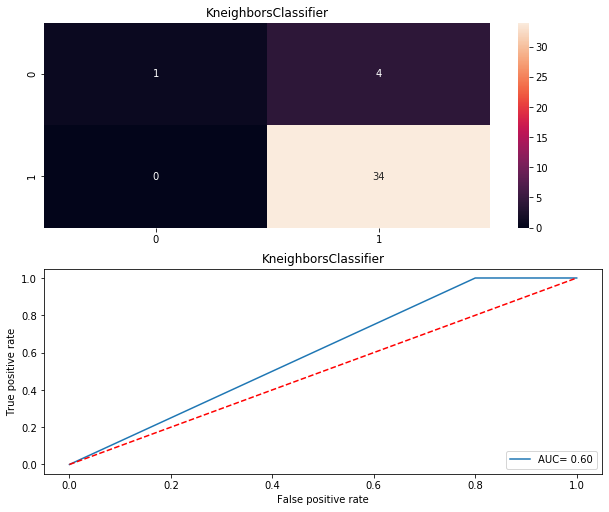

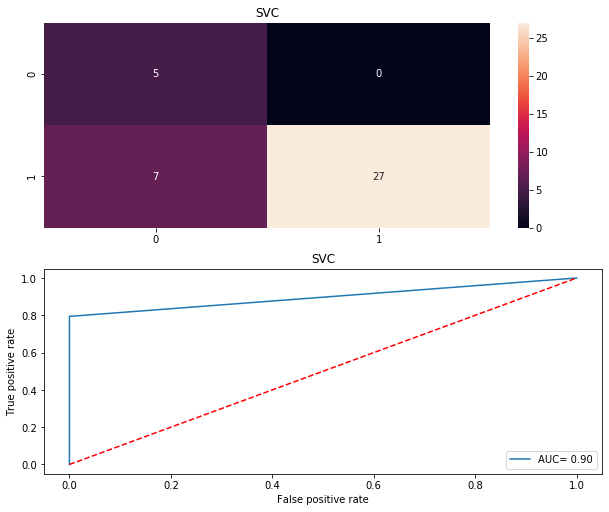

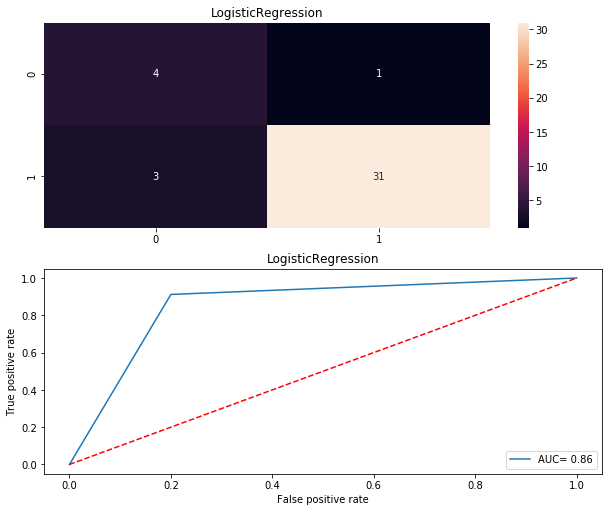

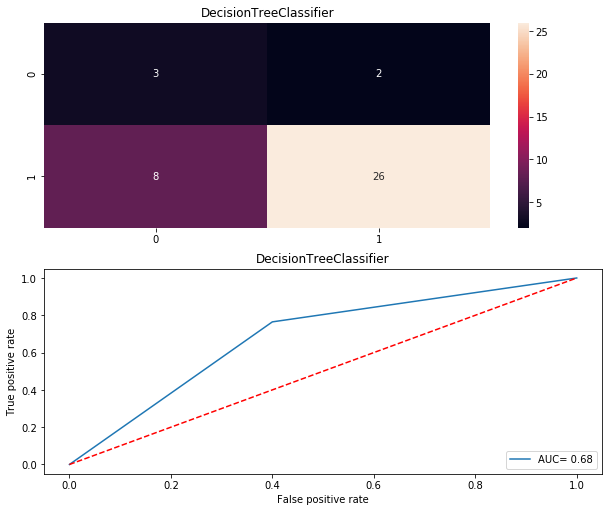

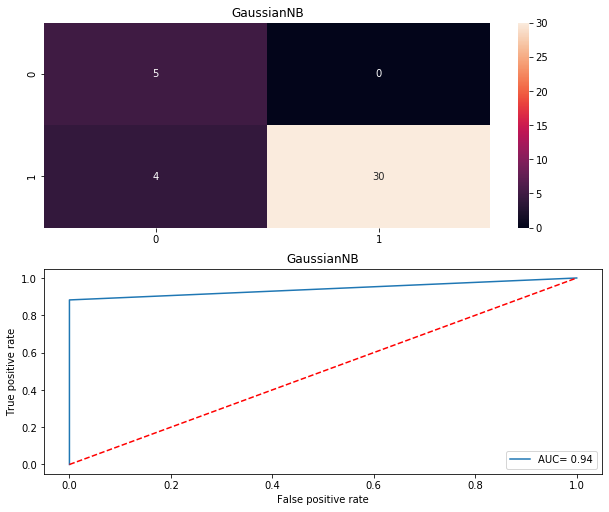

In [348]:
model_list=[]
score=[]
cvs=[]
rocscore=[]

for name, model in models:
    print('*************************',name,'*************************',end='\n\n')
   
    model_list.append(name)
    model.fit(x_train,y_train)
    print(model,end='\n\n')
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy score =',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,cds_x,y, cv=10, scoring='accuracy').mean()
    print('cross validation score =',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pre)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score = ', roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate, label='AUC= %0.2f'%roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True positive rate')
    plt.xlabel('False positive rate')
    print('\n\n')
    


In [349]:
result=pd.DataFrame({'Model': model_list, 'Accuracy_score': score, 'Cross_val_score':cvs,'Roc_auc_score': rocscore})
result

,Model,Accuracy_score,Cross_val_score,Roc_auc_score
0,KneighborsClassifier,89.743590,76.421053,60.000000
1,SVC,82.051282,81.657895,89.705882
2,LogisticRegression,89.743590,81.131579,85.588235
3,DecisionTreeClassifier,74.358974,72.842105,68.235294
4,GaussianNB,89.743590,82.710526,94.117647


I choose the GaussianNB model as my final model because it gives the best scores.

Accuracy_score = 89.7

Cross_val_score = 82.7

Roc_auc_score = 94.1

# Save the model

In [350]:
#save model as a pickle file
from sklearn.externals import joblib
joblib.dump(GNB,'Heart_disease.pkl')

['Heart_disease.pkl']

In [351]:
# Load and use model to make a prediction
model=joblib.load('Heart_disease.pkl')
model.predict(x_test)

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1], dtype=int64)